# MNIST
### Using Neural Networks to read hand written digits trained on MNIST database.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import *
import scipy.io
import scipy.optimize
from Algorithms import *     # Algorithms made for Cost Function and Gradient to run Neural Network
from DisplayData import *    # Displaying Data

> ## MNIST DATASET

We have 5000 training example of Handwritten digits. Each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is 'unrolled' into a 400-dimensional vector. This data is in native MATLAB format and hence number 1 to 9 are represented by 1 to 9 but 0 is represented by number 10 as MATLAB doesnt arrays start from index 1.(We will be converting this representation to python format, means converting 10 to 0)

In [13]:
Data = scipy.io.loadmat('MNIST_400.mat')

X_np = np.array(Data['X'])
y = np.array(Data['y'])
y = np.where(y == 10, 0, y)

> ### Visualizing the Data

We randomly generate a sample of 100 training examples from the training set of 5000 examples. The images are shown in a grid of 10 by 10 as you can see below.

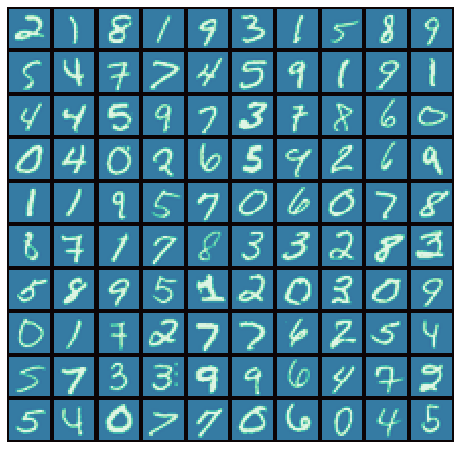

In [14]:
disp_X = DisplayData(X_np)
plt.figure(figsize=(8,8))
plt.axis('off')
ax = sns.heatmap(disp_X,cbar = False, cmap ="mako",vmin=-1, vmax=1)


We are loading a previously trained Neural-Network Parameters to see if our cost function works fine. Cost function value should be approximately 0.28 without regularization and 0.38 with a regularization parameter of 1.

In [15]:
theta = scipy.io.loadmat('theta_weights.mat')
Theta1 = theta['Theta1']
Theta2 = theta['Theta2']

In [16]:
nnParam = np.concatenate((Theta1.flatten(),Theta2.flatten()))
lambdaa = 0              # Regularization Parameter (omiting the word "lambda" as it is a key word in python)
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels  = 10         # 10 labels, from 1 to 10

#          Cost_Function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambdaa,key_change_Y, return_grad=False)
[J,grad] = Cost_Function(nnParam,input_layer_size,hidden_layer_size,num_labels,X_np,y,lambdaa,True,True)
print(f'With this arrangement and without Regularization the Cost Function = {J:0.06f}')

With this arrangement and without Regularization the Cost Function = 0.287629


In [17]:
lambdaa = 1         # Regularization Parameter set equal to 1

#          Cost_Function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambdaa,key_change_Y, return_grad)
[J,grad] = Cost_Function(nnParam,input_layer_size,hidden_layer_size,num_labels,X_np,y,lambdaa,True,True)
print(f'With the same arrangement and with Regularization the Cost Function = {J:0.06f}')

With the same arrangement and with Regularization the Cost Function = 0.383770


> ## Training our own Neural Network Parameters from scratch using Back-Propagation.

<li> We randomly initialize parameters for Neural Networks and Train it for regularization parameter = 0.3 for 300 iterations.
<li> When training neural networks, it is important to randomly initialize the parameters for symmetry breaking.
<li> We use the sigmoid function to squash the output of the neural network.
<li> Back Propagation is used to calculate the gradient of the cost function with respect to the parameters.

In [18]:
initial_theta1 = np.random.rand(25, 401)
initial_theta2 = np.random.rand(10, 26)

initial_nnParam = np.concatenate((initial_theta1.flatten(),initial_theta2.flatten()))
lambdaa = 0.3
nn_Param = scipy.optimize.fmin_cg(f=Cost_Function, x0=initial_nnParam, fprime=Theta_Grad, args=(input_layer_size,hidden_layer_size,num_labels,X_np,y,lambdaa,False,False),epsilon=1e-3, maxiter=280,full_output = True)

         Current function value: 0.185404
         Iterations: 280
         Function evaluations: 664
         Gradient evaluations: 663


We are opening the Trained Neural Network Parameters. Training these parameters takes a long time. But once these parameters are trained, prediction of the handwritten digits can be made very quickly.

In [19]:
Theta1 = np.reshape(nn_Param[0][:hidden_layer_size * (input_layer_size + 1)],(hidden_layer_size, input_layer_size + 1))
Theta2 = np.reshape(nn_Param[0][hidden_layer_size * (input_layer_size + 1):], (num_labels, hidden_layer_size + 1))

We use the trained parameters to predict the handwritten digits randomly. We output Real Value of the Handwritten Digits and Predicted Value of the Handwritten Digits along with it's image for visualization. You can run the code below multiple times (Shift + Enter) to randomly generate different images, predict their values and compare the results with original value.

Real Value = 9
Predicted Value = 9


(0.0, 22.0, 22.0, 0.0)

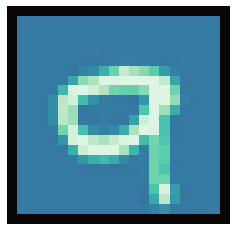

In [20]:
p = np.random.randint(0,X_np.shape[0])
print(f'Real Value = {y[p][0]}')
print(f'Predicted Value = {Predict(Theta1,Theta2,X_np[p])}')
plt.figure(figsize=(4,4))
ax = sns.heatmap(make_np_array(X_np[p]).T,cbar = False, cmap ="mako",vmin=-1, vmax=1)
plt.axis('off')

In [21]:
[Correct, Wrong] = Accuracy(X_np,Theta1,Theta2,y)
print(f'''Number of Samples   = {len(y)} 
Correctly Predicted = {Correct}
Wrongly Predicted   = {Wrong}
Accuracy            =  {100*Correct/(Correct+Wrong):0.2f}''')

Number of Samples   = 5000 
Correctly Predicted = 4986
Wrongly Predicted   = 14
Accuracy            =  99.72


Out of <code>5000</code> training samples <br> 
<code>4986</code> were predicted correctly whereas only <br>
<code>14</code> were predicted wrongly, <br>
This gives an Accuracy =  <code>99.72</code> <br>

> ### Visualizing the Neural Network Parameter of Hidden Layer.

One way to understand what your neural network is learning is to visualize what the representations captured by the hidden units.For the neural network you trained, notice that the $i^{th}$ row of $\theta^{(1)}$ is a 401-dimensional vector that represents the parameter for the  hidden unit. If we discard the bias term, we get a 400 dimensional vector that represents the weights from each input pixel to the hidden unit. one way to visualize the 'representation' captured by the hidden unit is to reshape this 400 dimensional vector into a 20 x 20 image and display it.

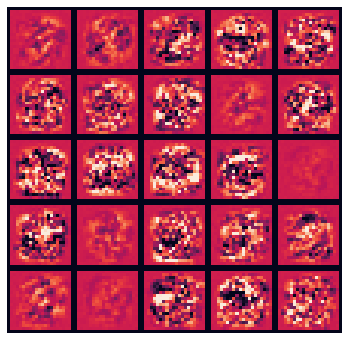

In [22]:
disp_Theta = Display_visualization(Theta1[:,1:])
plt.figure(figsize=(6,6))
#plt.imshow(disp_Theta, cmap = 'gray',vmin=-1, vmax=1)
plt.axis('off')
ax = sns.heatmap(disp_Theta,cbar = False, cmap ="rocket",vmin=-1, vmax=1)